# Data Analysis

In this section we will have a look at the difference in products between hedonic and utilitarian dirven products. We will see if we can find any patterns in the data from a descriptive level and then move on to a more inferential level.

## Packages and Importing Data

In [1]:
# Installing packages
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nltk import bigrams
from wordcloud import WordCloud


In [2]:
data_utilitarian = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final.csv')
data_hedonic = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final.csv')


# Functions for data analysis

In [3]:
# Putting df in a list
data_frames = [data_hedonic, data_utilitarian]

# Convert 'timestamp' column to datetime format for all DataFrames
for df in data_frames:
    df['timestamp'] = pd.to_datetime(df['timestamp'])

# Printing converted timestamp
for i, df in enumerate(data_frames):
    print(f"DataFrame {i+1}:\n{df['timestamp'].dtype}\n")


DataFrame 1:
datetime64[ns]

DataFrame 2:
datetime64[ns]



In [4]:
# Plotting reviews by year
def plot_reviews_by_year(df, product_type=None):
    # If product_types is not provided, get unique product types from the DataFrame
    if product_type is None:
        product_type = df['product'].unique()

    # Plotting
    for product_type in product:
        # Filter data for the current product type
        product_data = df[df['product'] == product_type]

        # Plot the histogram for the current product type
        plt.figure(figsize=(10, 6))
        product_data['year'].hist(bins=len(product_data['year'].unique()), alpha=0.5)
        plt.title(f'Distribution of Reviews by Year - {product_type}')
        plt.xlabel('Year')
        plt.ylabel('Number of Reviews')
        plt.grid(True)
        plt.show()


In [5]:
def avg_rating_by_year(df, product_types):
    # Group by year and product type, then calculate the average rating
    avg_rating_by_year_product = df.groupby(['year', 'prod_type'])['rating'].mean().unstack()

    # Plot the line chart
    plt.figure(figsize=(10, 6))
    for product_type in product_types:
        plt.plot(avg_rating_by_year_product.index, avg_rating_by_year_product[product_type], marker='o', label=product_type)

    plt.title('Average Rating of Reviews by Year')
    plt.xlabel('Year')
    plt.ylabel('Average Rating')
    plt.legend(title='Product Type', loc='upper left')
    plt.grid(True)
    plt.show()


In [6]:
# Rating and sentiment over time
def rating_and_sentiment_over_time(df, product_types):
    for product_type in product_types:
        # Filter data for the current product type
        product_data = df[df['product'] == product_type]
        
        # Group the data by timestamp and calculate the average rating for each time period
        average_rating_over_time = product_data.groupby(pd.Grouper(key='timestamp', freq='M'))['rating'].mean()

        # Group the data by timestamp and calculate the average sentiment score for each time period
        average_sentiment_over_time = product_data.groupby(pd.Grouper(key='timestamp', freq='M'))['sentiment'].mean()

        # Plotting
        fig, ax = plt.subplots(figsize=(10, 6))
        color = 'tab:blue'
        ax.plot(average_rating_over_time.index, average_rating_over_time.values, label='Average Rating', color=color)
        ax.set_xlabel('Date')
        ax.set_ylabel('Average Rating', color=color)
        ax.tick_params(axis='y', labelcolor=color)
        ax.grid(True)
        
        # Set y-axis limit for average rating
        ax.set_ylim(0, 5)

        ax2 = ax.twinx()
        color = 'tab:red'
        ax2.plot(average_sentiment_over_time.index, average_sentiment_over_time.values, label='Average Sentiment Score', color=color)
        ax2.set_ylabel('Average Sentiment Score', color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        
        # Set y-axis limit for average sentiment score
        ax2.set_ylim(0, 5)

        fig.suptitle(f'Average Rating and Sentiment Over Time for {product_type}')
        fig.tight_layout()

        plt.show()

In [7]:
# Function for showing the amount on reviews by year

def rating_counts_by_year_with_product_types(df, product_types):
    for product_type in product_types:
        # Filter data for the current product type
        product_data = df[df['prod_type'] == product_type]

        # Extract the year from the timestamp
        product_data['year'] = product_data['timestamp'].dt.year

        # Map ratings to categories (1 and 2 as negative, 3 as neutral, 4 and 5 as positive)
        rating_categories = {1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}
        product_data['rating_category'] = product_data['rating'].map(rating_categories)

        # Group by year and rating category, then count the occurrences
        rating_counts_by_year = product_data.groupby(['year', 'rating_category']).size().unstack(fill_value=0)

        # Plot the stacked bar plot
        plt.figure(figsize=(10, 6))
        rating_counts_by_year.plot(kind='bar', stacked=True, color=['red', 'grey', 'green'], alpha=0.7)
        plt.title(f'Rating Distribution by Year for {product_type}')
        plt.xlabel('Year')
        plt.ylabel('Number of Ratings')
        plt.legend(title='Rating Category', loc='upper left')
        plt.grid(True)
        plt.show()


In [8]:
# Showing sentiment distribution by year

def sentiment_by_year(df):
    # Extract the year from the timestamp
    df['year'] = df['timestamp'].dt.year

    # Plot the box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='year', y='sentiment', data=df, palette='Set2')
    plt.title('Distribution of Text Sentiment by Year')
    plt.xlabel('Year')
    plt.ylabel('Text Sentiment')
    plt.grid(True)
    plt.show()


# 1. Basic statistic

In [10]:
plot_reviews_by_year (data_hedonic)
plot_reviews_by_year (data_utilitarian)


UnboundLocalError: local variable 'product_types' referenced before assignment

## 2. Utilitarian Product Analysis

## 3.Hedonic Product Analysis

In [11]:
plot_reviews_by_year(data_hedonic)

UnboundLocalError: local variable 'product_types' referenced before assignment

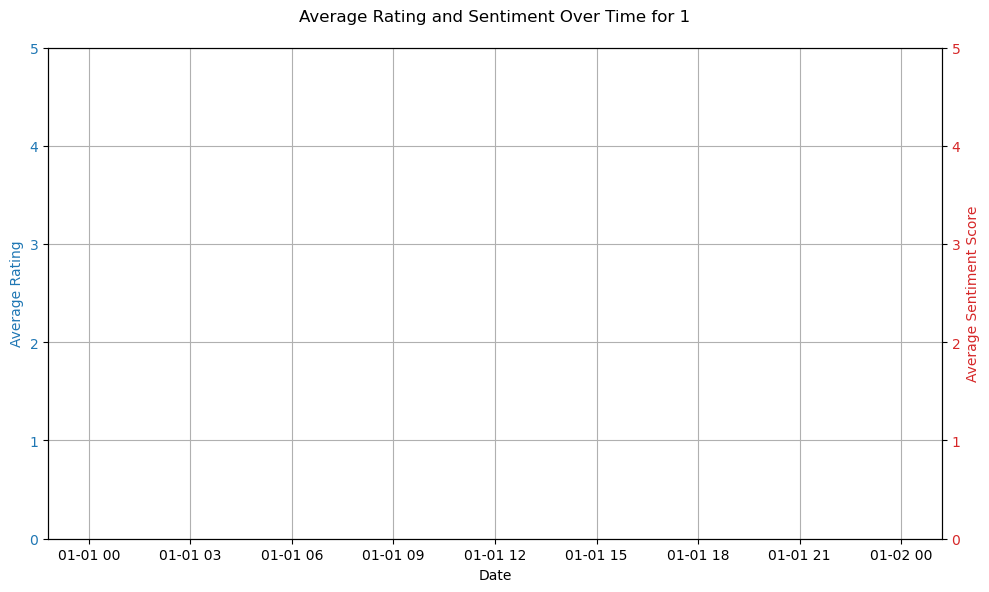

In [13]:
# Example usage:
# Get unique product types
product_types = data_hedonic['prod_type'].unique()
rating_and_sentiment_over_time(data_hedonic, product_types)

## Analyzing Helpfulness

In [14]:
# Function for plotting helpfulness distribution

def plot_helpfulness_votes_over_time(data_frame):
    # Group by timestamp and calculate the sum of helpfulness votes
    votes_by_timestamp = data_frame.groupby('timestamp')['helpful_vote'].sum()

    # Filter out timestamps with less than or equal to 1 helpful vote
    votes_by_timestamp = votes_by_timestamp[votes_by_timestamp > 1]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(votes_by_timestamp.index, votes_by_timestamp, color='blue', alpha=0.5)
    plt.title('Helpfulness Votes over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Total Helpful Votes')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


In [15]:
helpful_reviews_count = data_utilitarian[data_utilitarian['helpful_vote'] > 0].shape[0]
print("Number of reviews with at least one helpful rating:", helpful_reviews_count)

Number of reviews with at least one helpful rating: 3483


## 3. Text Analysis Wordclouds 

In [17]:
# Generating Wordclouds

def generate_wordcloud_reviews_by_sentiment(df):
    # Define rating categories
    rating_categories = {1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # Iterate over each sentiment category
    for ax, sentiment in zip(axes.flatten(), ['Negative', 'Neutral', 'Positive']):
        # Filter out reviews based on sentiment
        reviews = df[df['rating'].map(rating_categories) == sentiment]
        
        # Drop rows where 'text_cleaned1' column contains NaN values
        reviews.dropna(subset=['text_cleaned1'], inplace=True)
        
        # Concatenate the cleaned text of reviews
        text = ' '.join(reviews['text_cleaned1'])

        # Generate bigrams from the text
        bigram_list = list(bigrams(text.split()))

        # Create a WordCloud object with bigrams
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(dict(bigram_list))

        # Plot the WordCloud
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'Word Cloud of {sentiment} Reviews (Bigrams)')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()